**Note**: Remember to change your runtime type to use GPU. This will accelerate the training later on.

In this notebook, you will **fine-tune** the YOLO version 5 model to detect between two classes from your webcam.

## YOLO Algorithm

YOLO (You Only Look Once) is a popular object detection model in computer vision. It was introduced in a 2015 [research paper](https://arxiv.org/pdf/1506.02640.pdf) by Joseph Redmon, Santosh Divvala, Ross Girshick, and Ali Farhadi.

Traditional object detection approaches involve running a region proposal algorithm (like selective search) followed by a separate classifier to determine the object class within each proposed region. These methods can be slow and computationally expensive.

In contrast, YOLO takes a different approach. It divides the input image into a grid and predicts bounding boxes and class probabilities directly from each grid cell. The grid cells allow the model to make predictions for multiple objects in different spatial locations simultaneously. This way, the detection process becomes much faster and more efficient.

Key features of YOLO include:

- Single Forward Pass: YOLO performs object detection in a single forward pass through the neural network, making it extremely fast compared to multi-stage methods.

- Unified Framework: YOLO unifies object detection and classification into a single neural network, which leads to better generalization and end-to-end optimization.

- Objectness Score: The model predicts an "objectness" score for each bounding box, indicating how likely the box contains an object. This helps YOLO focus on relevant regions and ignore empty areas.

- Real-Time Detection: YOLO is designed for real-time applications and can achieve impressive frame rates even on relatively low-end hardware.

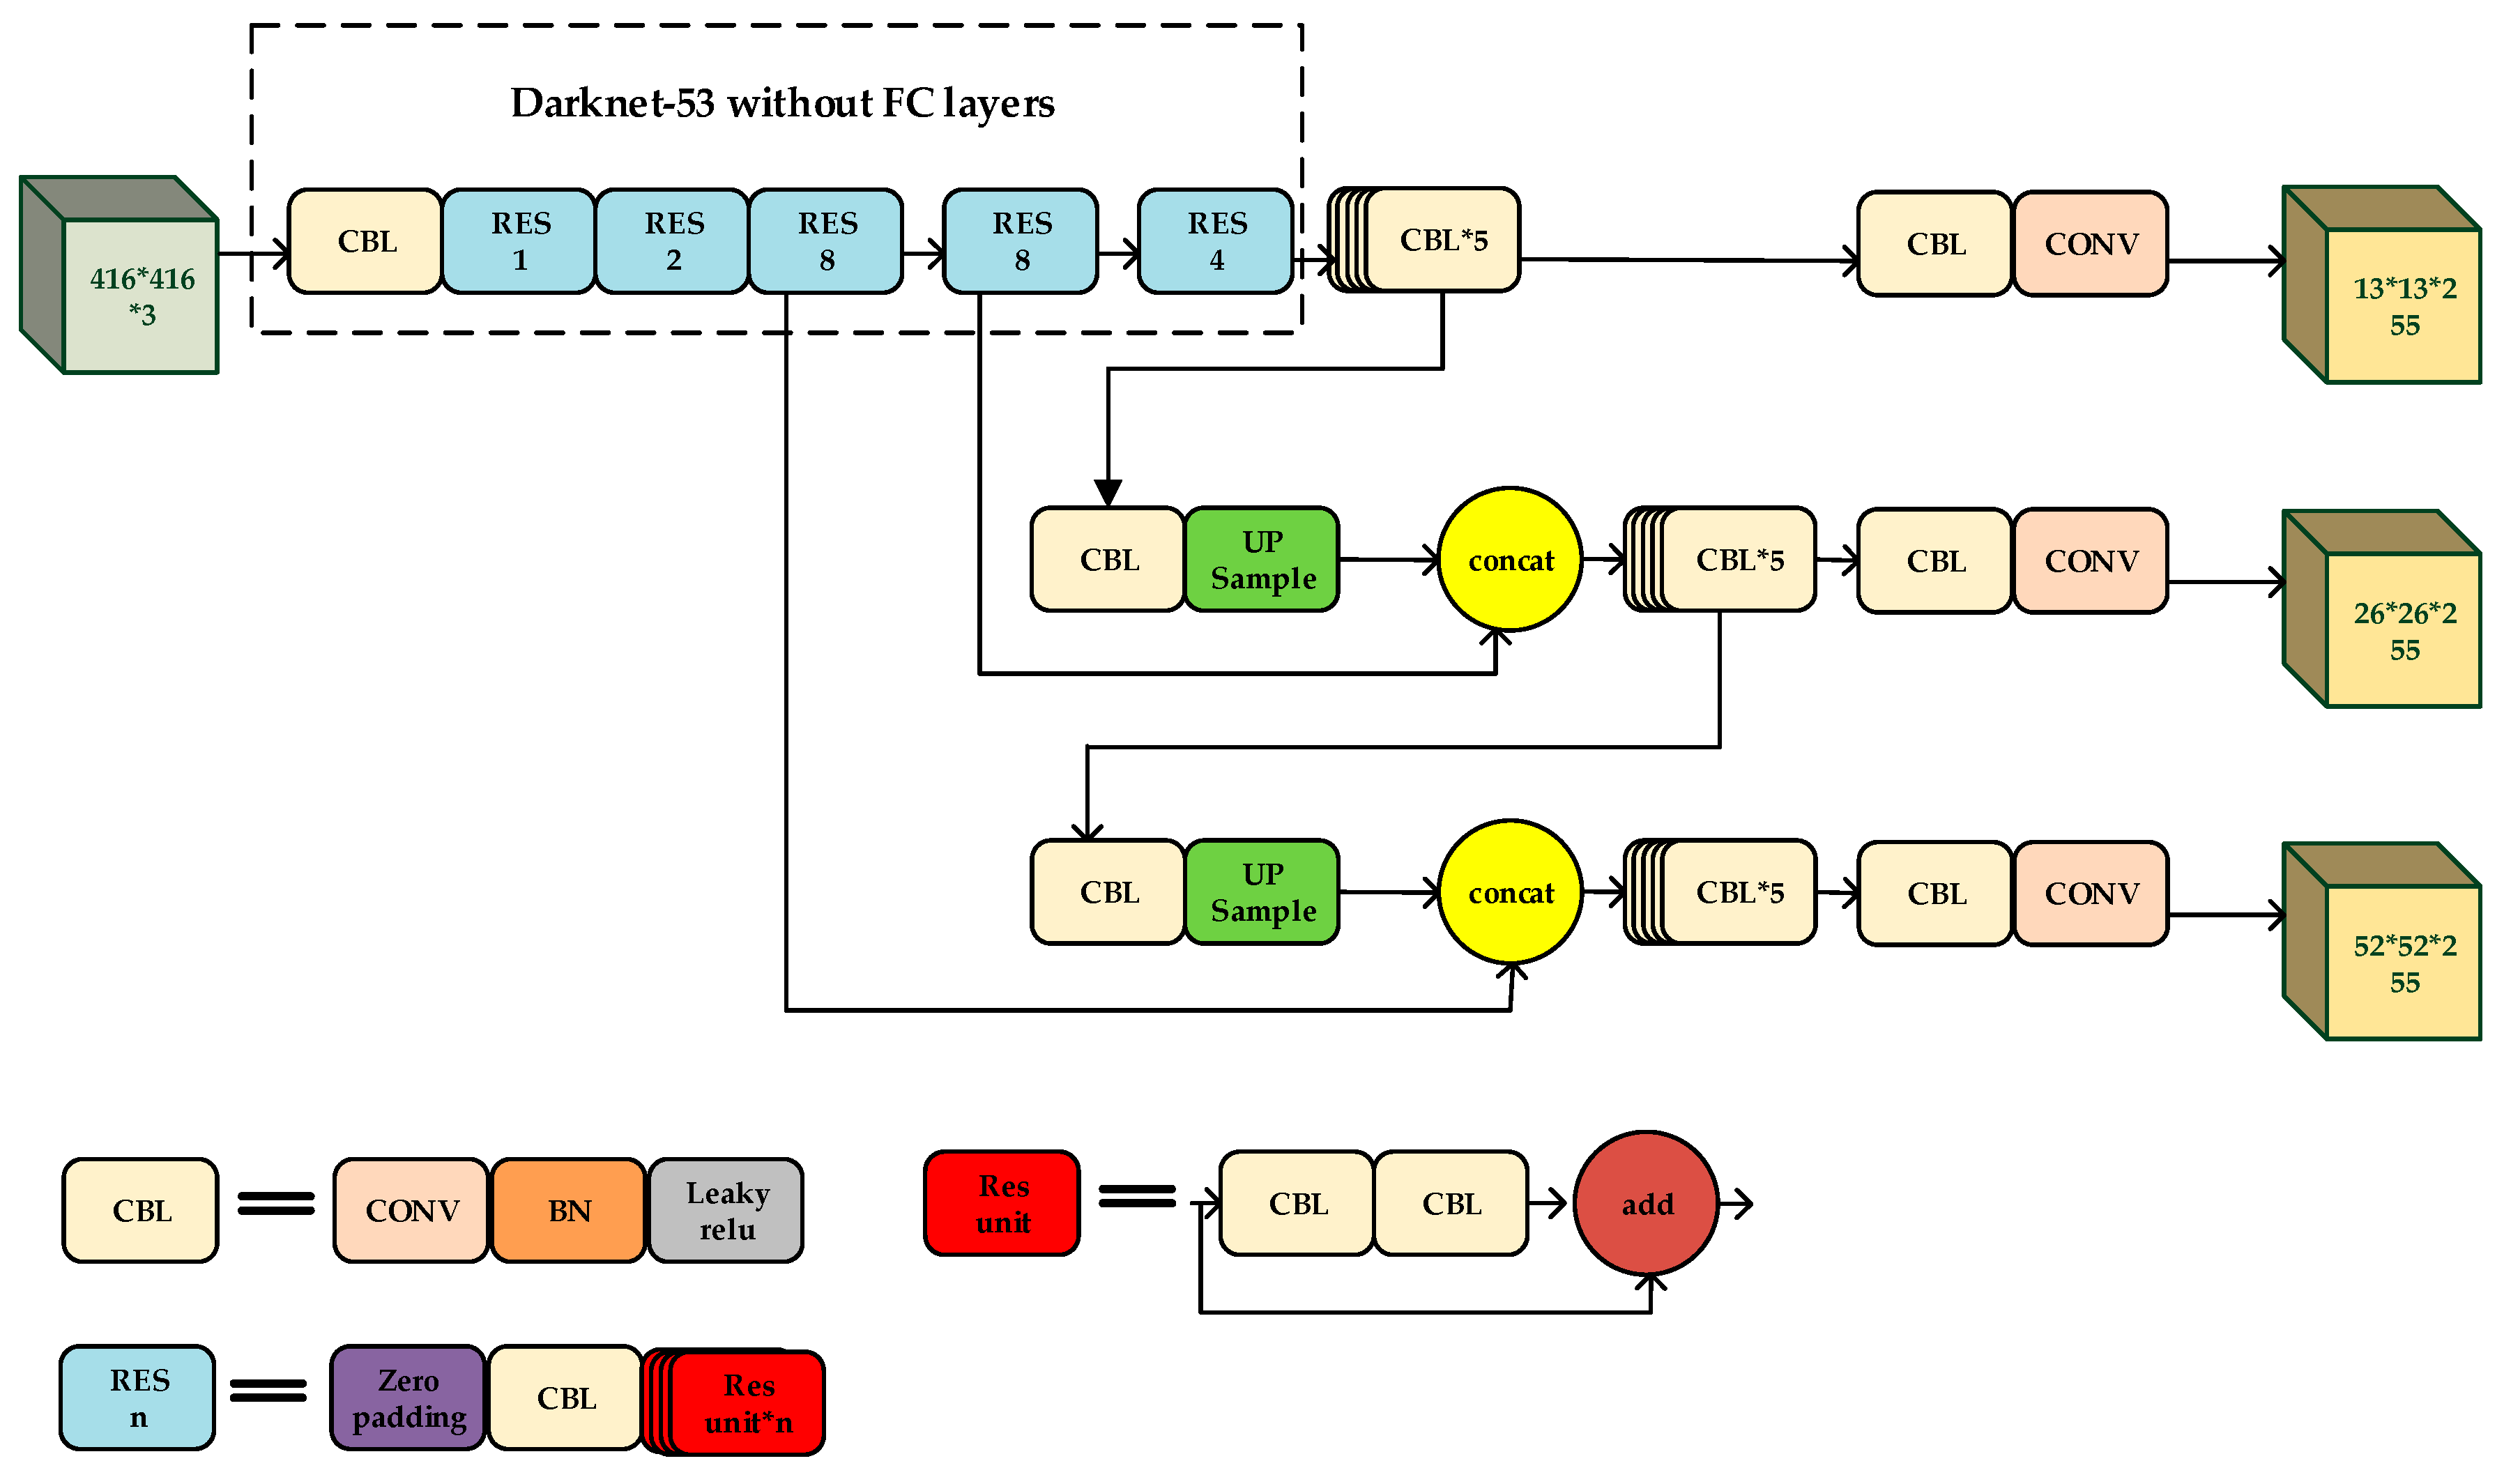

#Install and Import Dependencies

In [1]:
# https://pytorch.org/get-started/locally/
!pip3 install torch torchvision torchaudio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.8 MB/s eta 0:00:00


In [2]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16522, done.
remote: Counting objects: 100% (120/120), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 16522 (delta 48), reused 50 (delta 16), pack-reused 16402
Receiving objects: 100% (16522/16522), 15.13 MiB | 7.93 MiB/s, done.
Resolving deltas: 100% (11310/11310), done.


In [3]:
!pip install -r yolov5/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 723.1/723.1 kB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.9 MB/s eta 0:00:00


In [4]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# Load Model

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

/usr/local/lib/python3.10/dist-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-3-24 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

100%|██████████| 14.1M/14.1M [00:00<00:00, 318MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


The following cell displays the structure of the model you're working with.

In [6]:
print(model)

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# Make Detections with Images

Now that we've loaded the model, let's see what it's capable of. Here's an example:

In [7]:
img = 'https://p1.pxfuel.com/preview/890/123/692/new-york-highline-skyline-city.jpg'

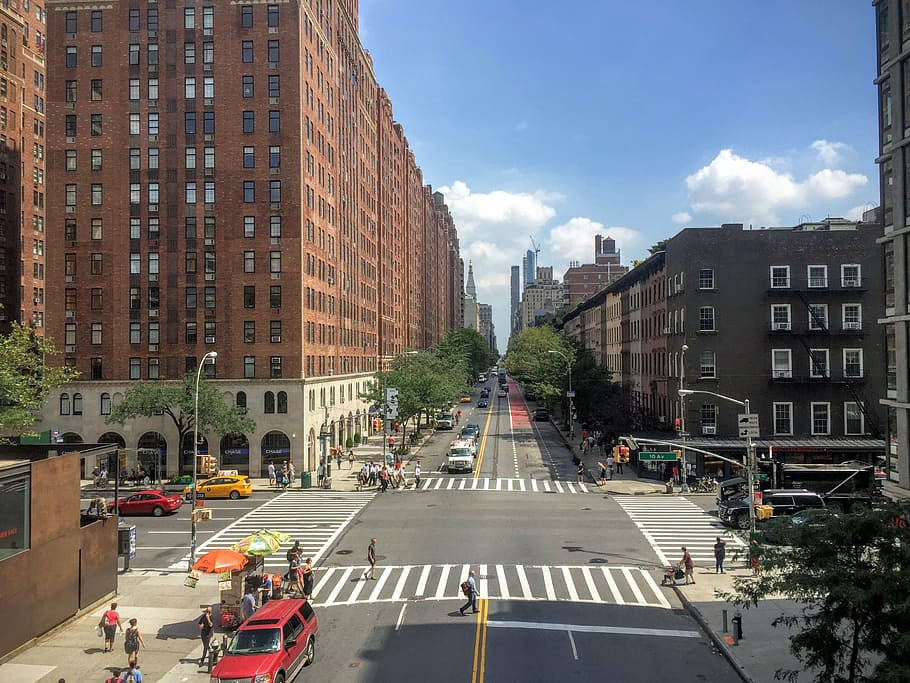

In [8]:
import requests
from IPython.display import Image

response = requests.get(img)

if response.status_code == 200:
    with open("example.jpg", "wb") as f:
        f.write(response.content)

    display(Image("example.jpg"))
else:
    print("Failed to download the image. Status code:", response.status_code)

In [9]:
results = model(img)
results.print()

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1: 683x910 11 persons, 9 cars, 2 umbrellas
Speed: 200.3ms pre-process, 157.0ms inference, 1241.5ms NMS per image at shape (1, 3, 480, 640)


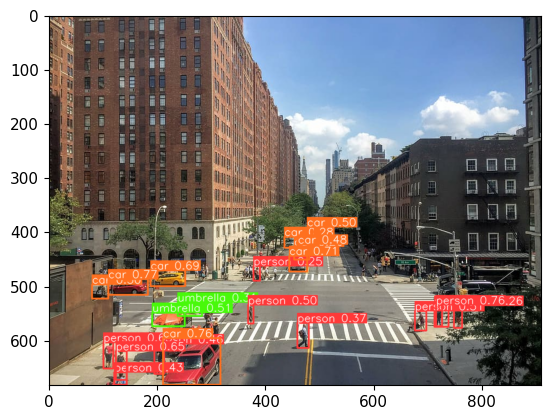

In [10]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

Search the web for a photo you'd like to test the model on. Paste the url to the image below.

In [13]:
img = "https://c7.alamy.com/comp/FC58N5/fat-bad-boy-with-sausage-FC58N5.jpg"

In [14]:
results = model(img)
results.print()

image 1/1: 953x1300 1 person
Speed: 1087.3ms pre-process, 8.3ms inference, 3.4ms NMS per image at shape (1, 3, 480, 640)


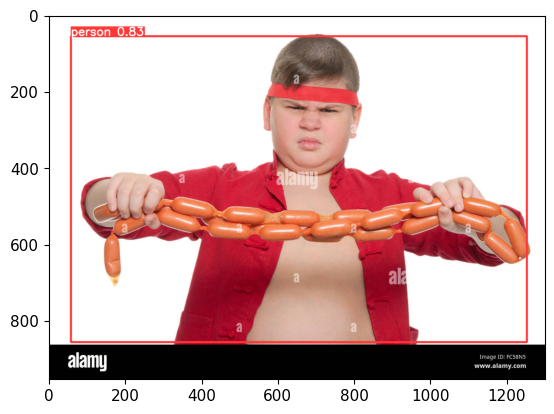

In [15]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

# Connecting to Webcam

Now connect to your webcam to start making your own unique dataset. The following code defines a function `take_photo` in Javascript.

In [16]:
import os
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

Try taking a photo of yourself and see what YOLO classifies you as.

In [26]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

NotFoundError: Requested device not found


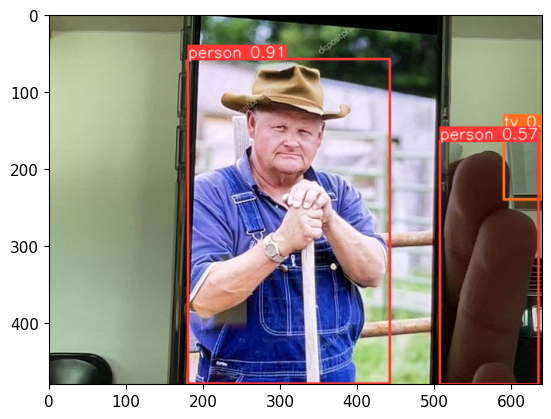

In [27]:
img = os.path.join('photo.jpg')
results = model(img)
plt.imshow(np.squeeze(results.render()))
plt.show()

Hopefully you've been classified as a person!

# Generate the Data

Now you will generate your own data in order to fine tune the model. Train a model to detect when you are awake versus when you are drowsy. Here is a quick overview of the plan:
1. Take a bunch of pictures of yourself awake and drowsy
2. Store the pictures in the `data/images` path
3. Download the data
4. Label the data using [cvat.ai](https://www.cvat.ai/)

Begin by importing relevant Python modules.

In [22]:
import uuid # Unique identifier for each image file
import os
import time

Next, set up the file paths. This is very important! Note, make sure `CLEAR_DATA` is set to False in all cases, except for when you want to restart and delete the pictures you've taken so far.

In [23]:
CLEAR_DATA = False
if CLEAR_DATA and os.path.isdir('data'):
  !rm -r data
if not os.path.isdir('data'):
  os.mkdir('data')
  os.mkdir('data/images')
  os.mkdir('data/labels')
labels = ['awake', 'drowsy']

Next, begin creating your dataset. Follow the instructions and take pictures of yourself either awake or drowsy.

Some things to note before creating your data:
- try to have a variety of different backgrounds while taking these pictures
- take pictures at different angles
- put your head in different parts of the frame
- have different facial expressions within the same class

Following these guidelines will ensure that your model can generalize more to unseen images.



In [24]:
number_imgs = 20

In [25]:
DISPLAY_IMAGE = False
for label in labels:
    print('Collecting images for \033[1m{}\033[0m'.format(label))
    time.sleep(2)
    for img_num in range(number_imgs):
        print('Collecting images for \033[1m{}\033[0m, image number \033[94m{}\033[0m'.format(label, img_num))

        imgname = 'data/images/' + f"{label}." + str(uuid.uuid1()) + '.jpg'

        take_photo(imgname)

        if DISPLAY_IMAGE: display(Image(filename))

        time.sleep(0.25)

<IPython.core.display.Javascript object>

MessageError: NotFoundError: Requested device not found

Next, download the data. Note that it may take a minute for the `data.zip` file to show up in your files.

You can access your files by clicking on the file tab on the right.

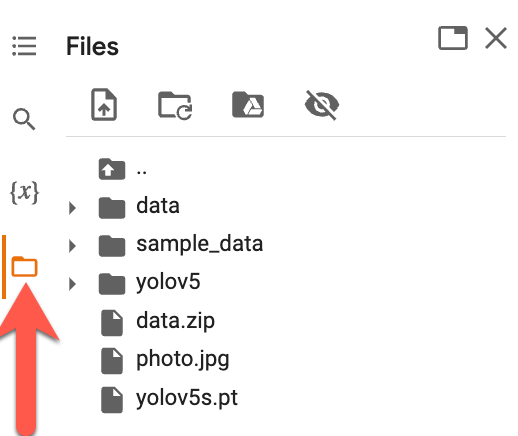

In [ ]:
!zip -r data.zip /content/data


Now that you have a `data.zip` folder, download it. Verify that it contains the images you took.

# Annotate the Data

Now that you have our data, you need to annotate it! **It is not as simple as just labeling each image according to your class, since you need to find the specific bounding box of each object.**

The next part of this notebook is the trickiest. Go to [cvat.ai](https://app.cvat.ai/auth/login?next=/tasks), and create a free account.

Once you log in, you should see a page that looks something like this:

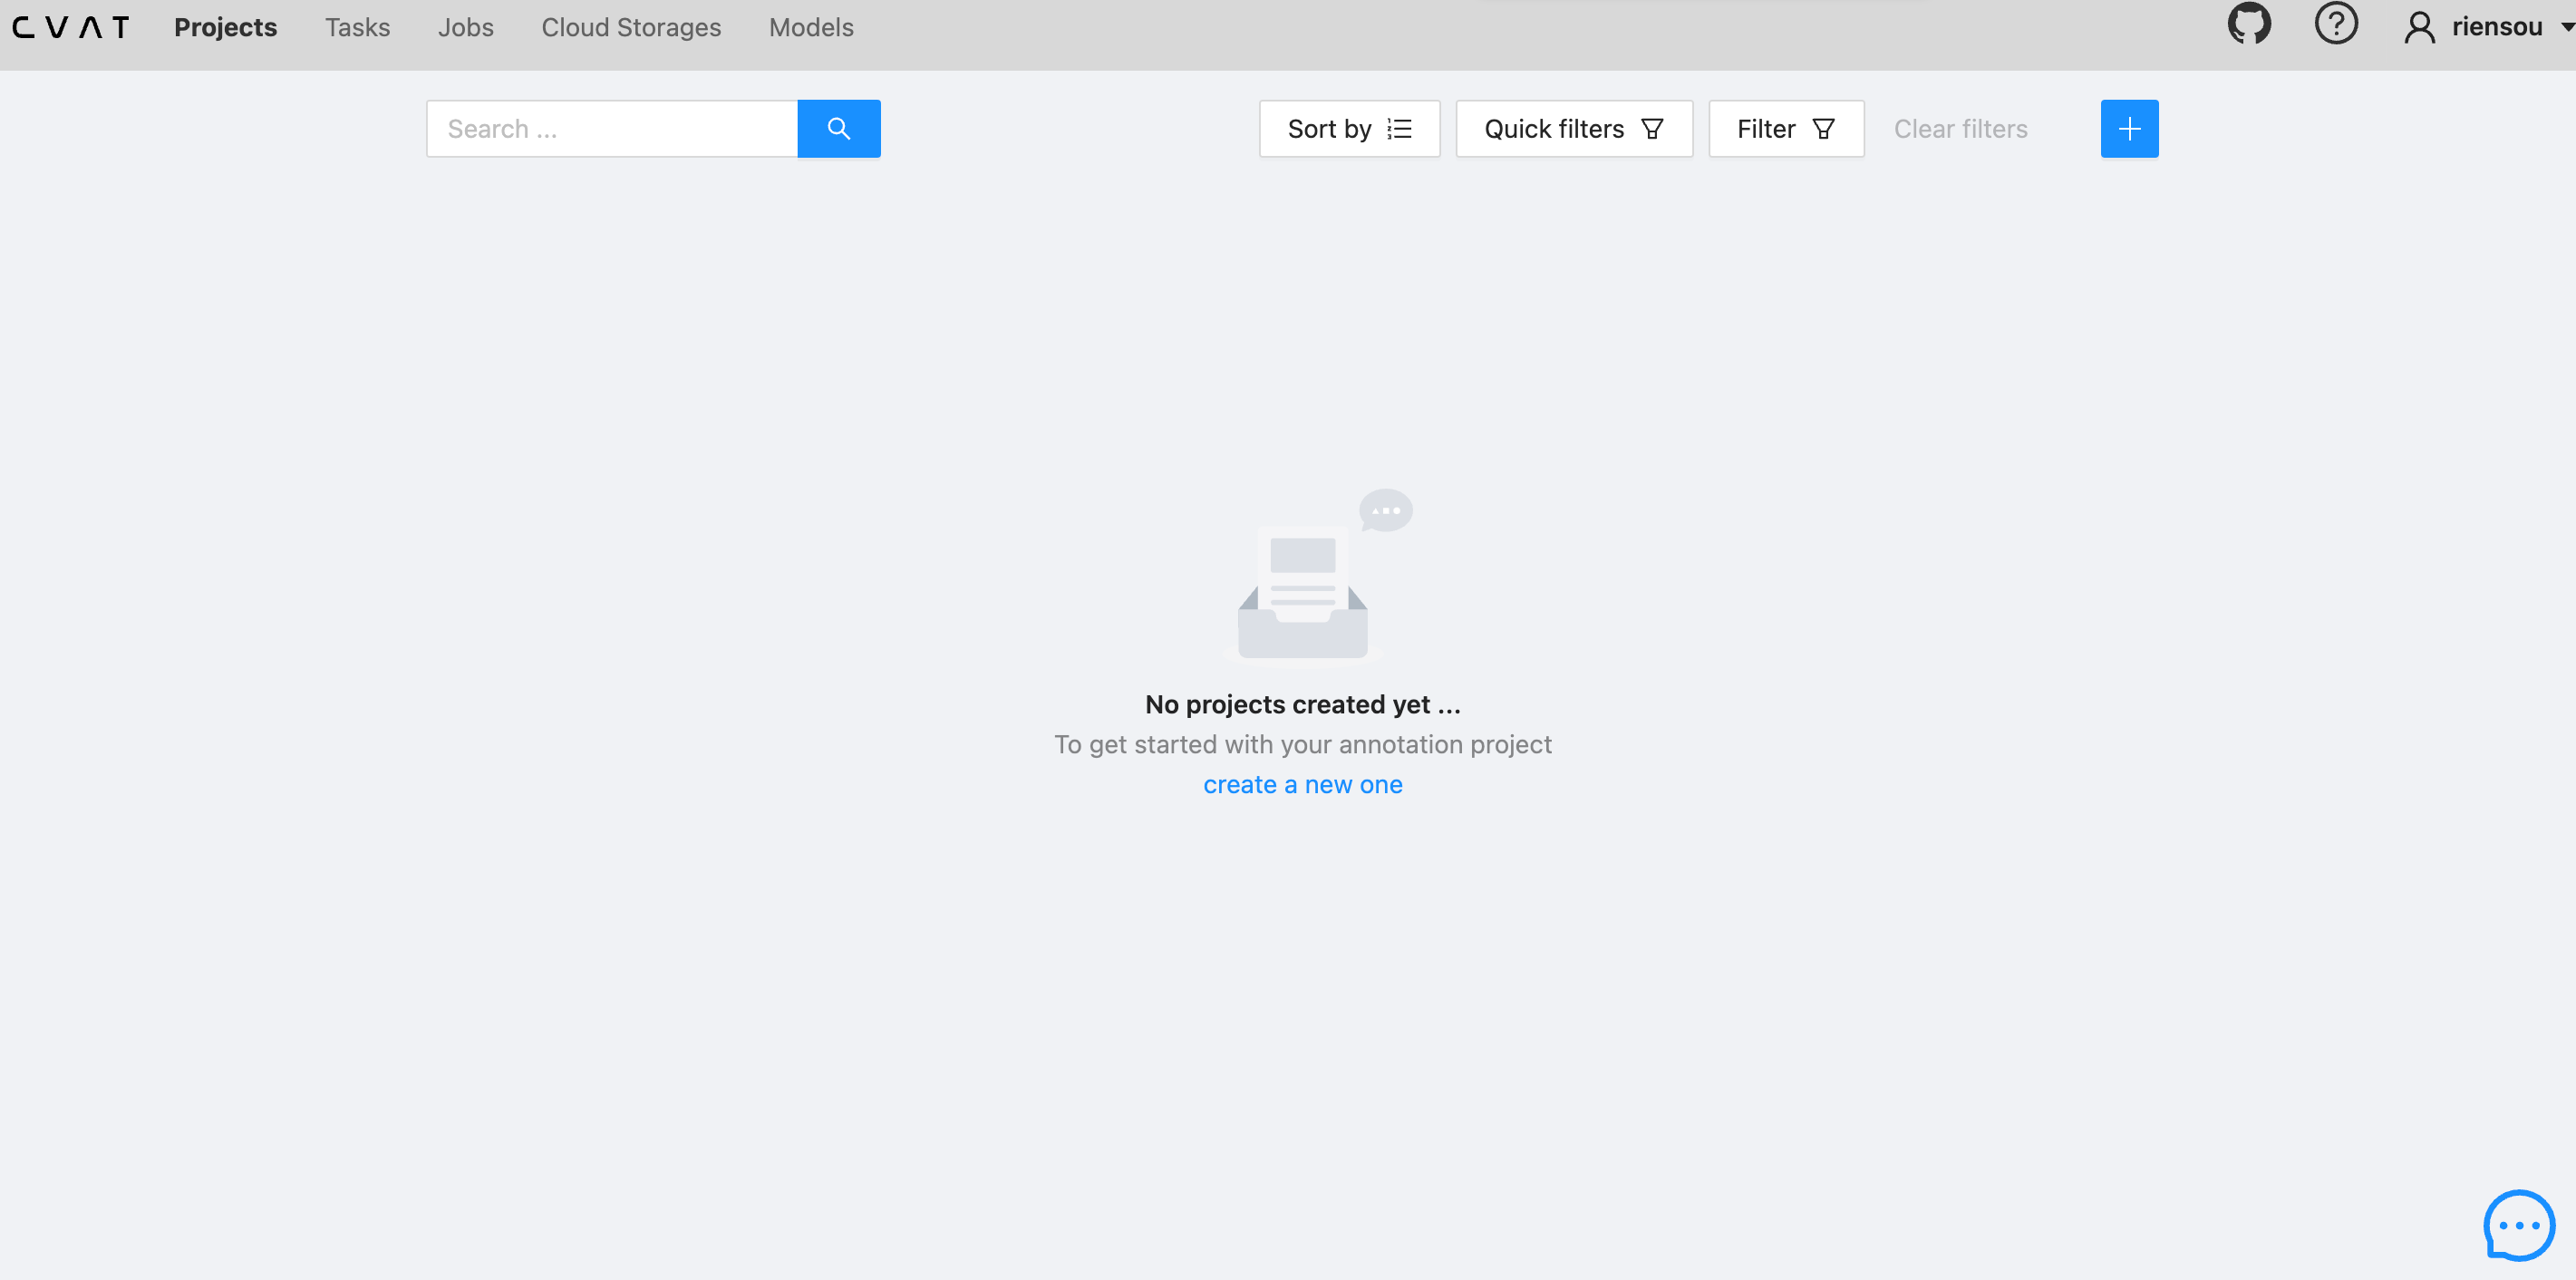

Next, go to the `Tasks` page. Press the `+` button at the top right, and create a new task.

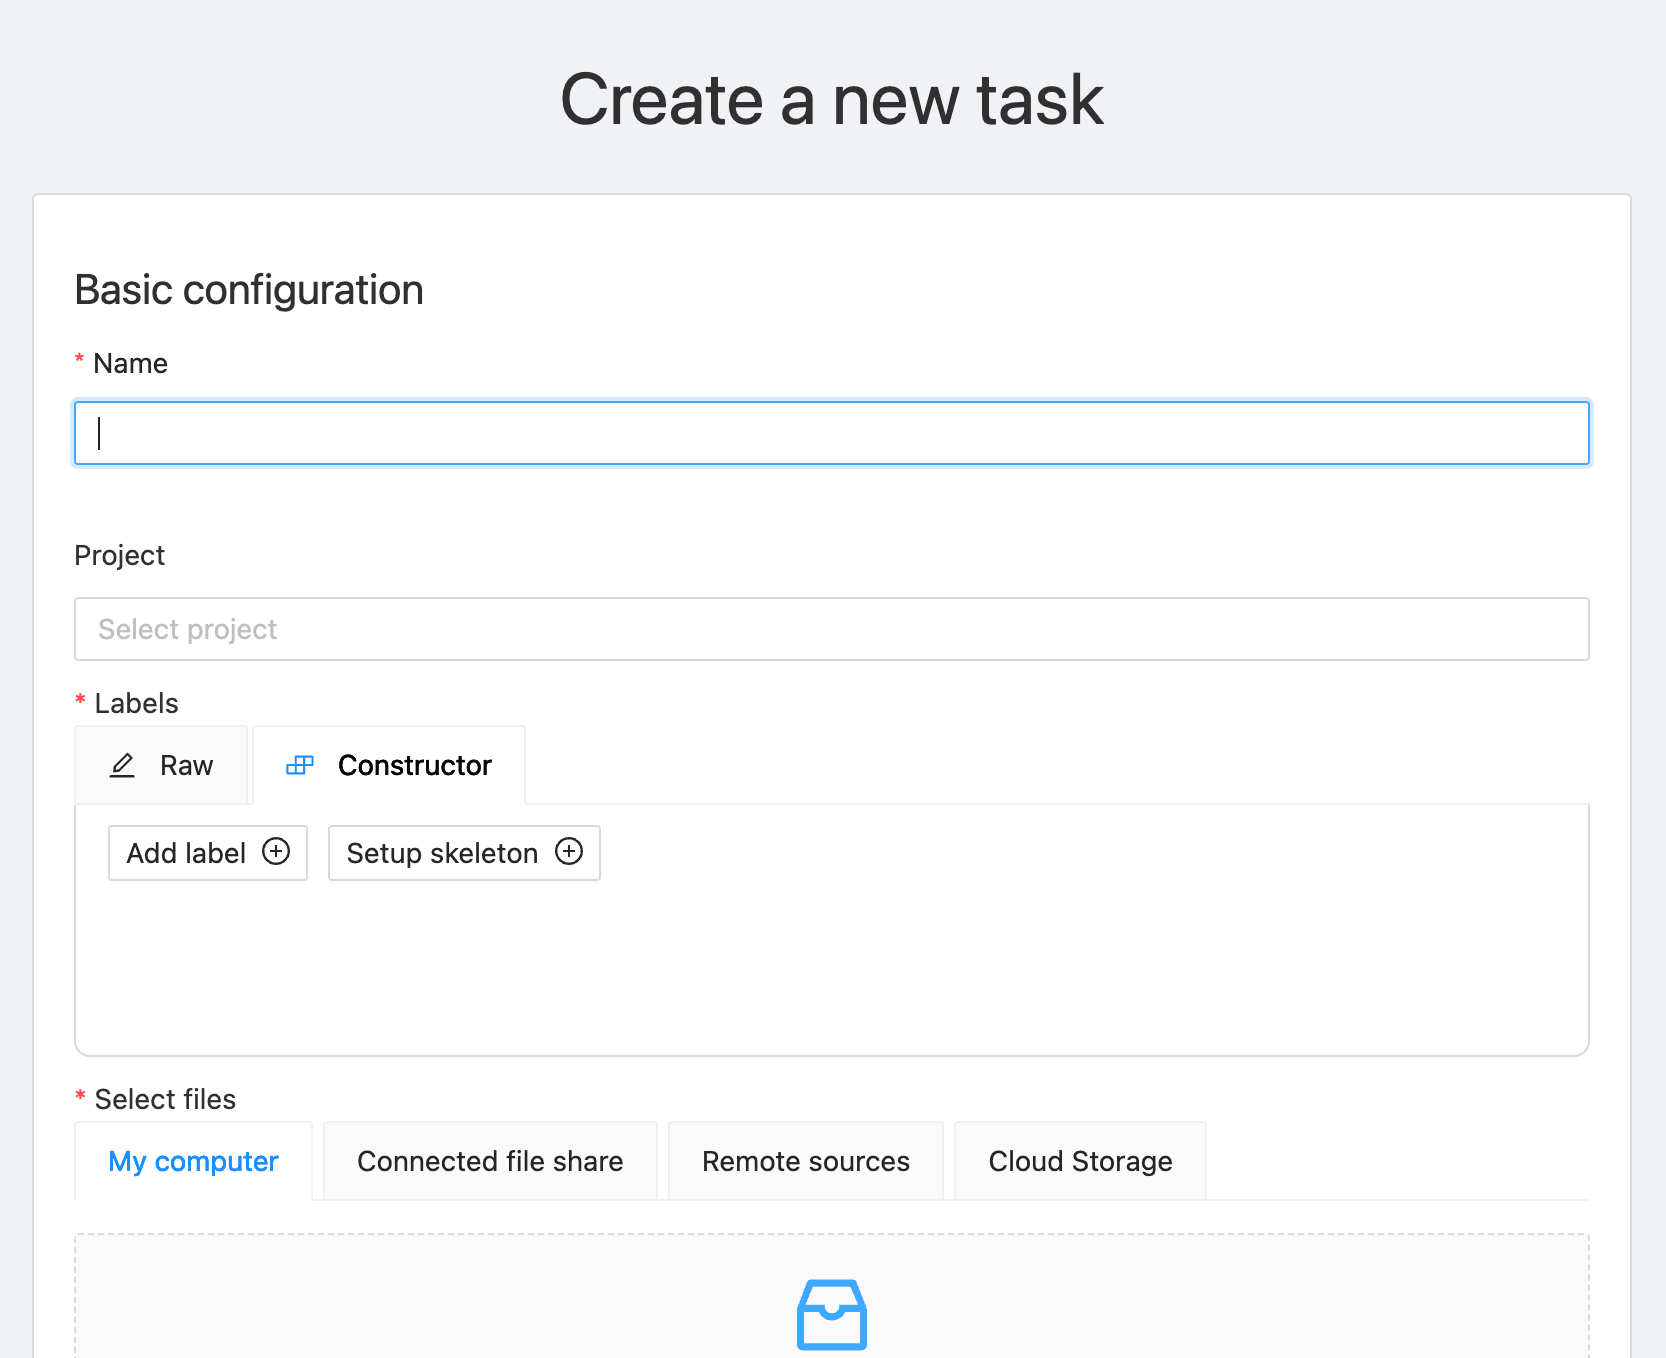

Name your task whatever you want.

Add a label by selecting 'Add label'. Then name it `awake` and select `Rectangle` in the drop-down menu. You can also choose a color. Then press 'Continue'.

Repeat this process for the 'drowsy' label.

After creating both labels, press 'Cancel'. You should see something like this:

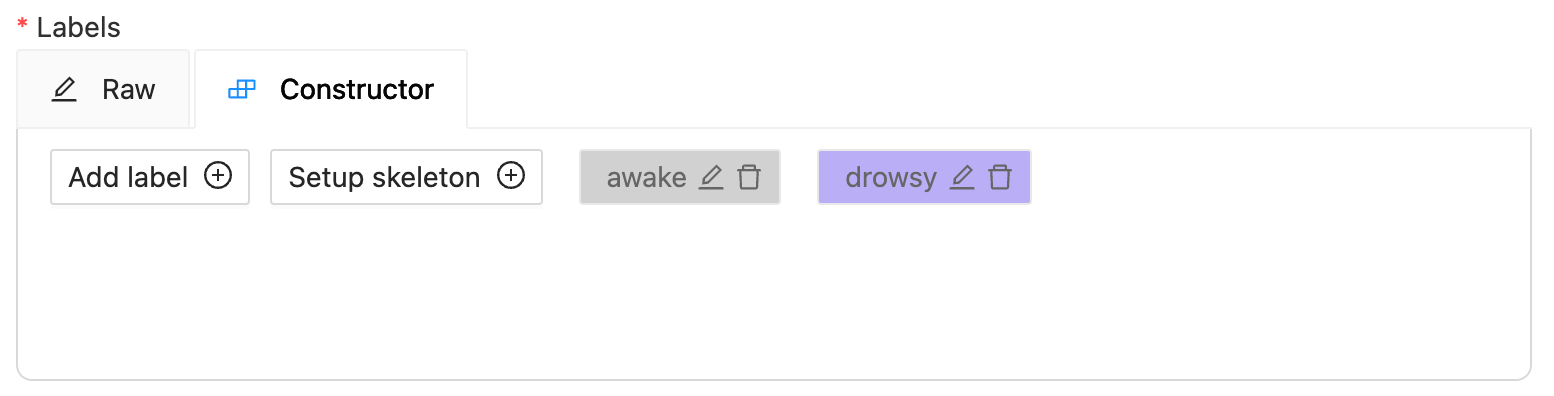

Next, add all of your images downloaded earlier.

Finally, click 'Advanced configuration' and scroll to where it says 'Choose format'. Select `YOLO 1.1`. This will ensure that the labels are generated using the proper format.

Press 'Submit & Continue'.

Now go to the Jobs page. You should see a job with one of your pictures being displayed.

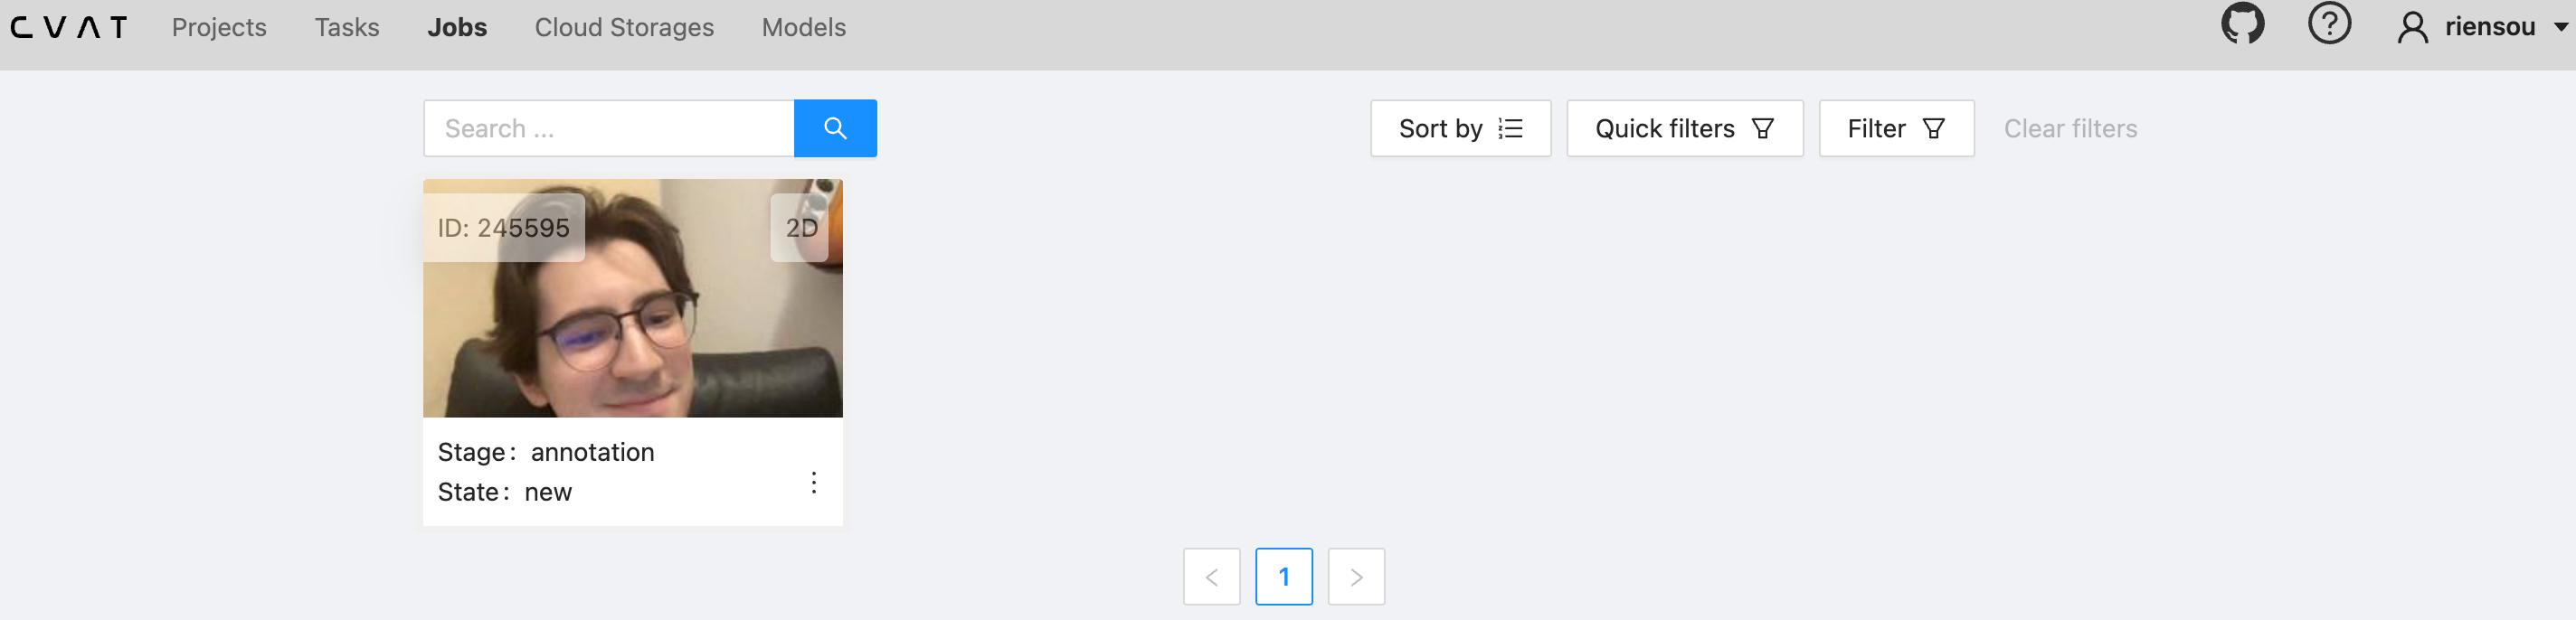

Click on the job, and begin the labelling process. Note that there are many ways to label your data.

Select the Draw a new rectangle tool and Shape tool. Also, select the appropriate label. Draw a box around wherever the label fits.

**Important Note**: **Be as precise as possible with your annotations. The more irrelevant information included within the bounds of your annotations, the easier it is for your model to overfit.**

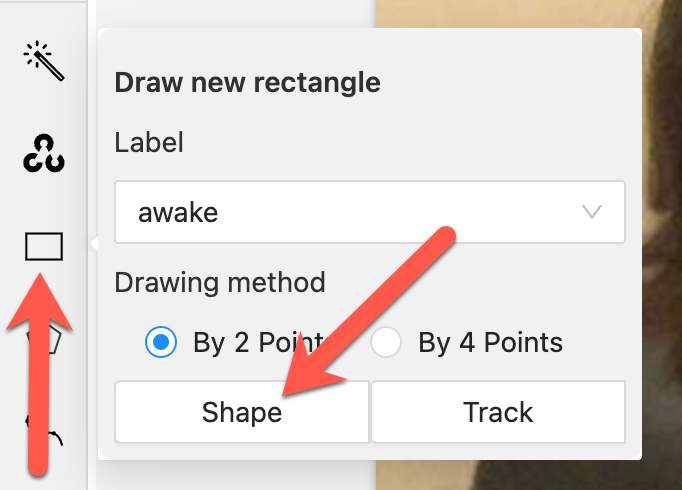

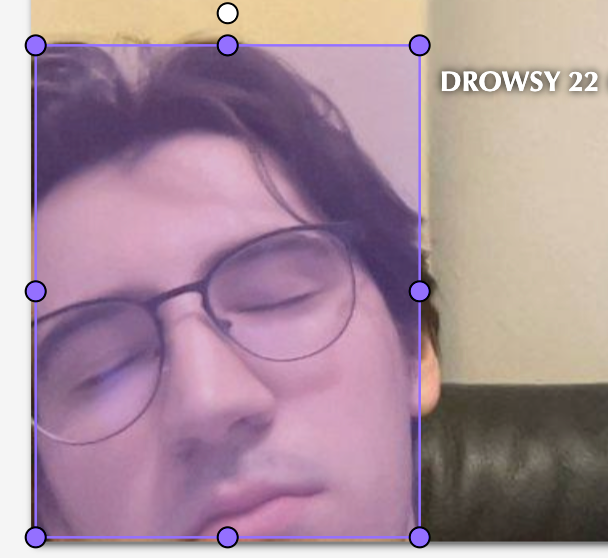

Note that you can use the keyboard shortcut `[Shift+N, N]` to do this repeatedly. However, **remember to change your label when necessary**.

Now, go through all of your pictures and label them appropriately.

Once you're done labelling every image, save your changes, and go to `Menu>Export job dataset`. Select `YOLO 1.1` for the export format and then press 'OK'.

Open the zip folder that you download and you should see 4 things:
- obj_train_data (folder)
- obj.data (file)
- obj.names (file)
- train.txt (file)

For each file in the obj_train_data folder, you should see something like this:

`0 0.150391 0.561427 0.291906 0.861396`,

where the first number corresponds to the label number (awake or drowsy) and the next four numbers correspond to the corners of the rectangle that you labeled.

Next, upload all of the files in the obj_train_data folder into the google colab files in the `data/labels` directory. After this step, your `data/labels` directory should have as many files are your `data/images` directory.



In [ ]:
num_files_in_images = len([entry for entry in os.listdir('data/images') if os.path.isfile(os.path.join('data/images', entry))])
num_files_in_labels = len([entry for entry in os.listdir('data/labels') if os.path.isfile(os.path.join('data/labels', entry))])
if num_files_in_images == num_files_in_labels:
  print("Success: you have an equivalent amount of files in data/images and data/labels")
else:
  print("Error: you have a different number of files in data/images and data/labels")

Congratulations! You have successfully created, labeled, and uploaded training data and labels! You are almost ready to fine tune the model.

The final step is to create a file called `dataset.yml` that will tell our model what and where our data and labels are. In a code editor / text editor such as Visual Studio code, create a file called `dataset.yml` with the following entries.

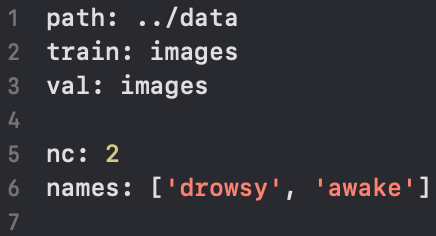

Then, upload `dataset.yml` and place it inside the `yolov5` folder.

# Train the model

We will now fine tune the `yolov5` model on our new training data. It may take a long time to run for a large number of epochs.

For reference, 500 epochs will take about 20-25 minutes to run. The amount of epochs that you need to run will depend on the difficulty of your task. For our drowsy vs awake model, it tends to take in the hundreds of epochs before performing adequately.

In [ ]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

Congratulations! You have fine tuned the `yolov5` model! Now copy and paste the path it saved the results to in the following cell to load our newly fine-tuned model.

In [ ]:
path = # Your path here

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/' + path + '/weights/best.pt', force_reload=True)


# Testing the model

Take a new photo and test your model.

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  results = model(filename)
  print(results)
  plt.imshow(np.squeeze(results.render()))
  plt.show()
except Exception as err:
  print(str(err))

Now test your model on all of your training data to see how well you fit to the new data.

In [ ]:
for img in os.listdir('data/images/'):
  if not os.path.isdir(img):
    results = model('data/images/'+img)
    print(results)
    plt.imshow(np.squeeze(results.render()))
    plt.show()

# Addendum: Real-time detection

YOLO is an incredibly efficient model, so much so that you can run inference in real time.

One way you can achieve this is to think about how you might modify the `take_photo` function to automatically take a photo without clicking a button. Then, use this in a loop to repeatedly take photos. Pass these photos into the model and display the output to the user. Now you have a model!

Here's another method that takes in a video stream directly. However, this does not work on Colab, so you'll have to install Jupyter notebook locally to run this.

In [ ]:
# Does not work on colab, only works in local Jupyter notebooks

cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    # Make detections
    results = model(frame)

    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()